# (TMDB Dataset Exploration)
## by Abdelrahman Ragab

## Preliminary Wrangling

>  2017 TMDB 5000 Movies Dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sb



In [3]:
df_mov = pd.read_csv('tmdb-movies.csv')



In [4]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Let's change the data types of this columns

In [5]:
df_mov['revenue_adj'] = df_mov['revenue_adj'].astype(int)

df_mov['budget_adj'] = df_mov['budget_adj'].astype(int)

df_mov['revenue'] = df_mov['revenue'].astype(int)

df_mov['budget'] = df_mov['budget'].astype(int)


In [6]:
print(df_mov.isnull().sum())


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


let's delete the unusfel coloumns

In [7]:
df_mov.drop(['homepage','tagline','keywords','production_companies'],axis=1,inplace=True)

make sure

In [8]:
df_mov.dropna(inplace=True)
print(df_mov.isnull().sum())


id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64


In [9]:
df_mov.drop_duplicates(inplace=True) 
print(df_mov.duplicated().sum())

0


In [12]:
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10724.000000,10724.000000,1.072400e+04,1.072400e+04,10724.000000,10724.000000,10724.000000,10724.000000,1.072400e+04,1.072400e+04
mean,65184.471559,0.652858,1.481331e+07,3.994571e+07,102.503450,219.943305,5.964407,2001.254196,1.777690e+07,5.027959e+07
std,91474.417621,1.005072,3.107239e+07,1.156474e+08,30.460109,578.981655,0.930163,12.822467,3.447456e+07,1.434082e+08
min,5.000000,0.000188,0.000000e+00,-1.513461e+09,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,-2.147484e+09
25%,10545.750000,0.210766,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20307.500000,0.387247,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73937.500000,0.721577,1.600000e+07,2.500131e+07,112.000000,148.250000,6.600000,2011.000000,2.113258e+07,3.463038e+07
max,417859.000000,32.985763,4.250000e+08,2.068178e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,1.907006e+09


In [20]:
# here we removed the movies that has zero budget 
#we can also remove the 0 revenue 

df_mov = df_mov[df_mov.budget > 0]
df_mov = df_mov[df_mov.revenue > 0]

In [21]:
df_mov.describe().astype(int)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3848,3848,3848,3848,3848,3848,3848,3848,3848,3848
mean,39890,1,37196949,107119985,109,526,6,2001,44242511,132918483
std,67256,1,42099439,171298402,19,871,0,11,44707178,211109802
min,5,0,1,2,15,10,2,1960,0,-2147483648
25%,6071,0,10000000,13658034,95,71,5,1995,13158637,18341483
50%,11311,0,24000000,44884723,106,204,6,2004,30045238,61706855
75%,38576,1,50000000,124280388,119,580,6,2010,60651601,162750801
max,417859,32,425000000,2068178225,338,9767,8,2015,425000000,1907005841


In [23]:
print(df_mov.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848 entries, 0 to 10848
Data columns (total 17 columns):
id                3848 non-null int64
imdb_id           3848 non-null object
popularity        3848 non-null float64
budget            3848 non-null int32
revenue           3848 non-null int32
original_title    3848 non-null object
cast              3848 non-null object
director          3848 non-null object
overview          3848 non-null object
runtime           3848 non-null int64
genres            3848 non-null object
release_date      3848 non-null object
vote_count        3848 non-null int64
vote_average      3848 non-null float64
release_year      3848 non-null int64
budget_adj        3848 non-null int32
revenue_adj       3848 non-null int32
dtypes: float64(2), int32(4), int64(4), object(7)
memory usage: 481.0+ KB
None


### What is the structure of your dataset?

>  3848 after cleaning Movies in this dataset With 17 featuers 

> the data types are 7Strings, 8 integer , 2 float , 1 date .

>most of the featuers are numeric 

### What is/are the main feature(s) of interest in your dataset?

> the main featuers are release_year,budget_adj,revenue_adj budget,revenue,original_title,cast,director,genres

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> budget,revenue,genres,release_year

## Univariate Exploration



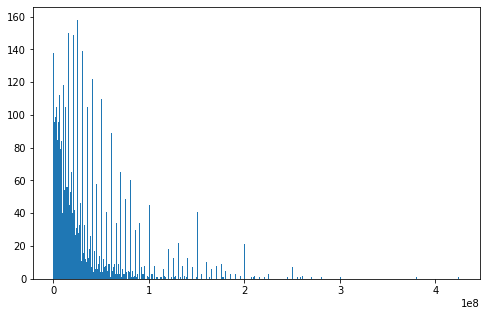

In [26]:
binsize = 1000000
bins = np.arange(0, df_mov['budget'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])


plt.hist(data = df_mov, x = 'budget',bins=bins);


> Here we can see that the histgram is skewd to the Right

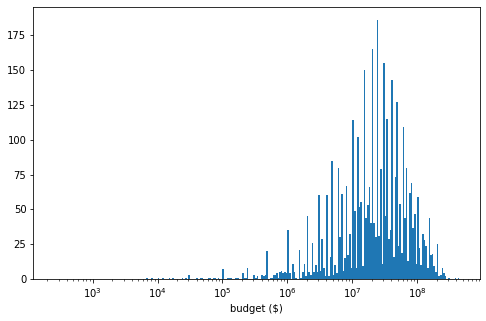

In [27]:
#here we scaled to see the budegt in more detiLS
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_mov['budget'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_mov, x = 'budget', bins = bins)
plt.xscale('log')
plt.xlabel('budget ($)')
plt.show()

>Here we can see budget is skewd to the left and the most commen budget is 100 milon 

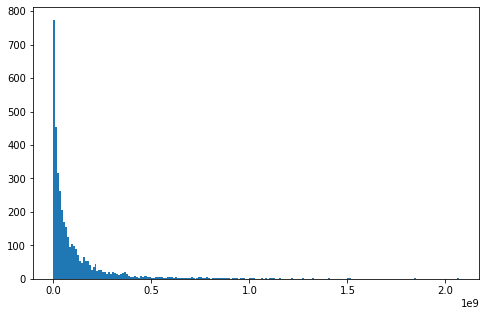

In [29]:
binsize = 10000000
bins = np.arange(0, df_mov['revenue'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])

plt.hist(data = df_mov, x = 'revenue',bins=bins);


> Here we can see that the histgram is skewd to the Right

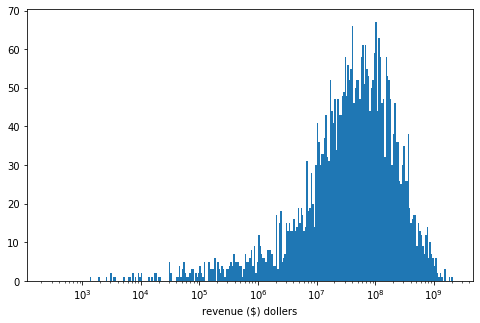

In [32]:
#here we scaled to see the revenue in more detiLS
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_mov['revenue'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_mov, x = 'revenue', bins = bins)

plt.xscale('log')

plt.xlabel('revenue ($) dollers')

plt.show()

>Here when we did the transformation we found that the budget is skewd to the left and the most commen revenue in the 100 milon range

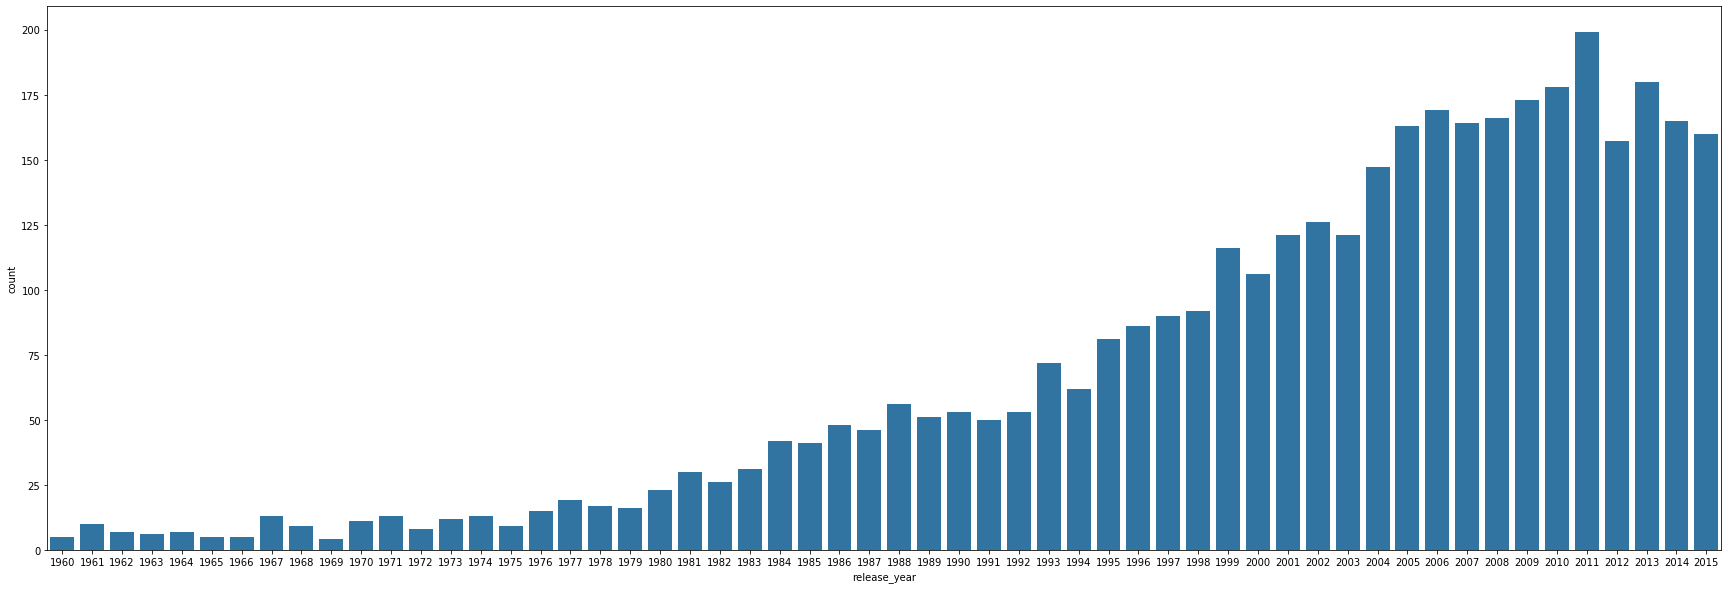

In [35]:
default_color = sb.color_palette()[0]

plt.figure(figsize=[30, 10])

sb.countplot(data = df_mov, x = 'release_year', color = default_color);

> Here we can see that the most Productive year was 2011

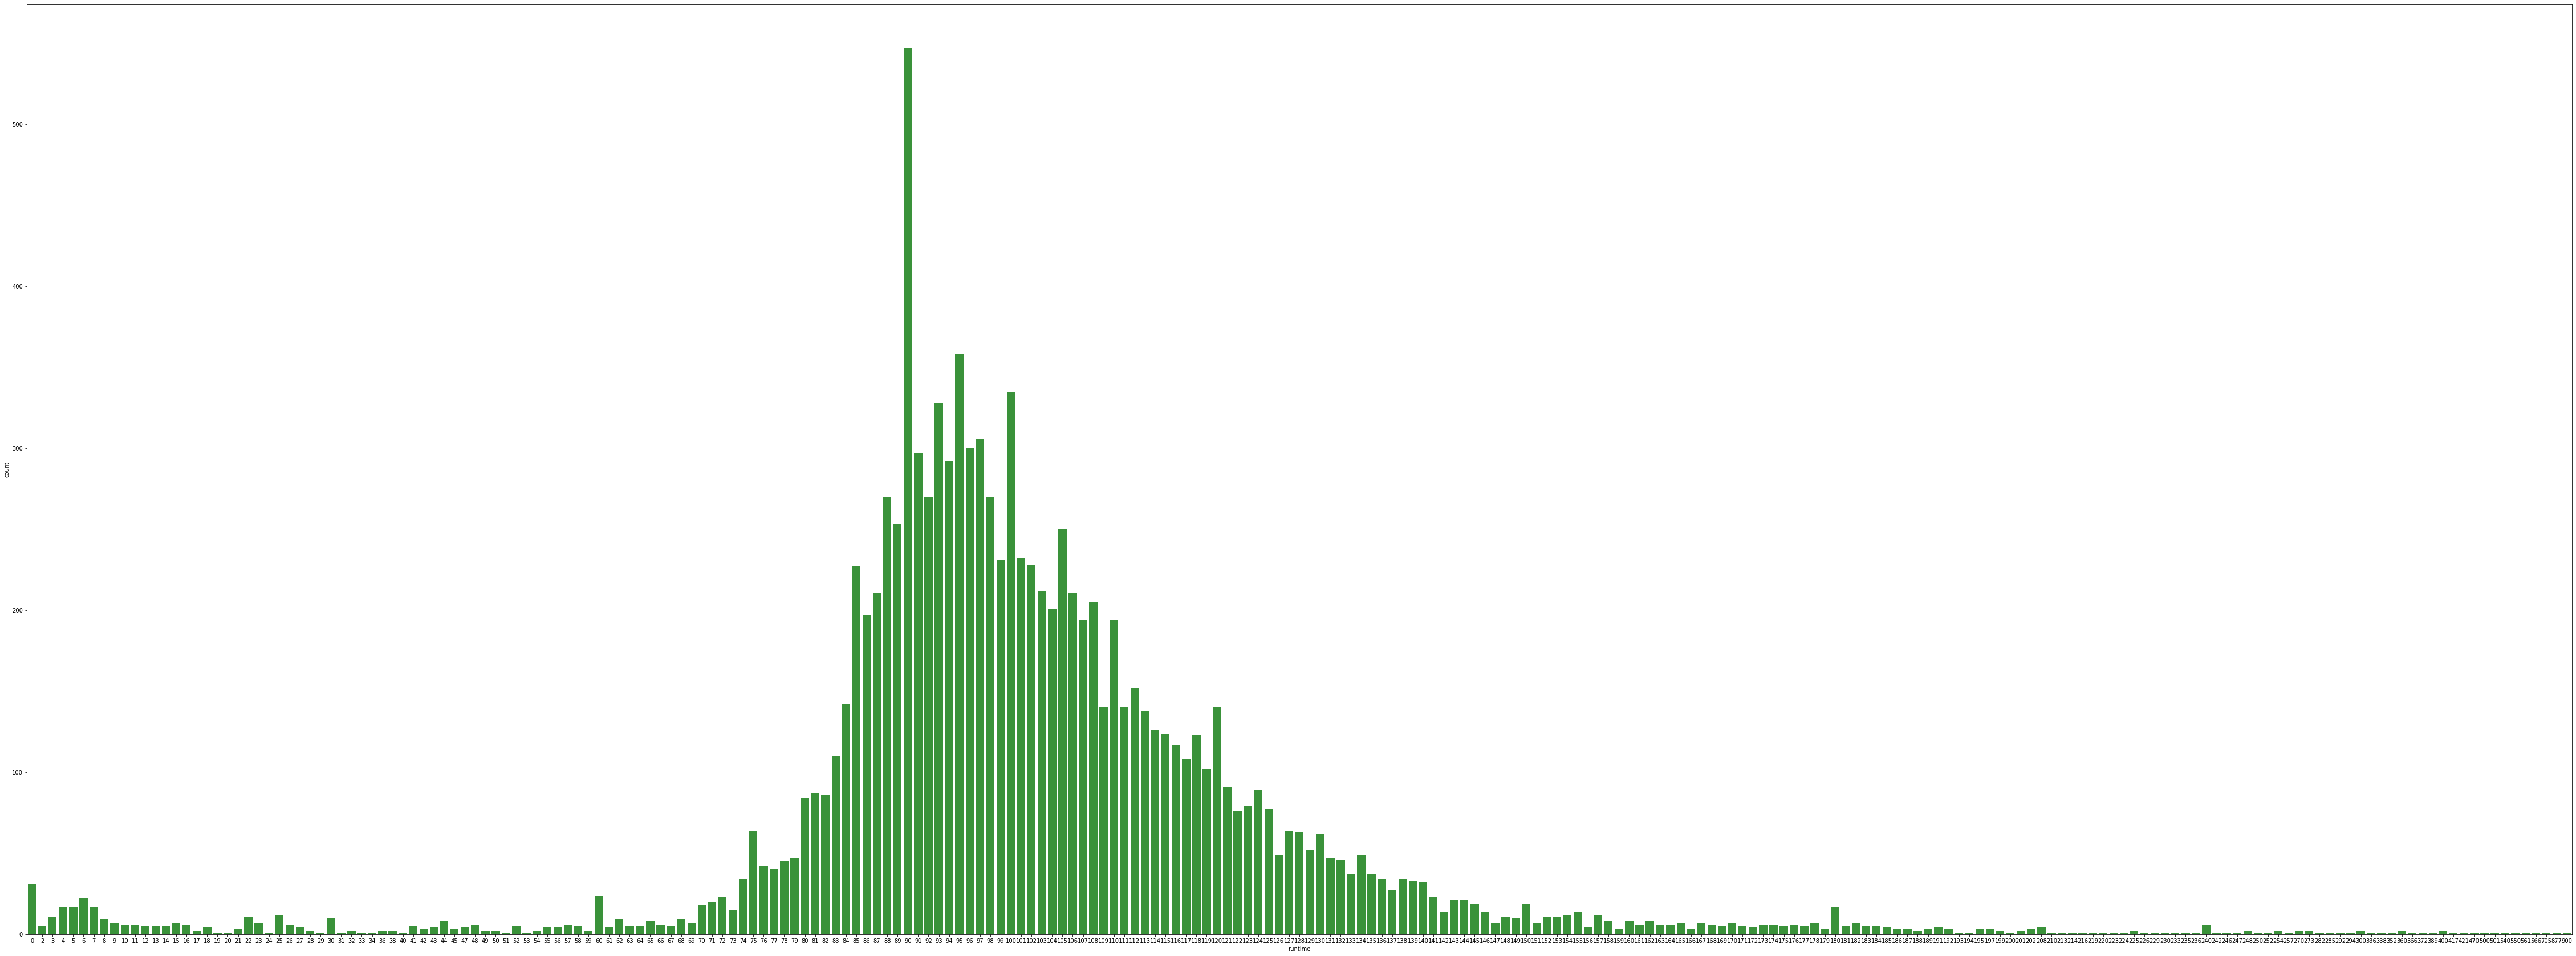

In [43]:
default_color = sb.color_palette()[2]

plt.figure(figsize=[80, 30])

sb.countplot(data = df_movies, x = 'runtime', color = default_color);

> Here we can see that the 2 most commen movies run time are 1 hour and half and 1 hour 40 min

In [45]:
# here we can find the most genere that return revenue

df_mov['genres'].groupby(df_mov['revenue']).agg(['sum'])

,sum
revenue,
2,Drama|HistoryRomance|Comedy
3,Adventure|Action|Comedy|Science Fiction|Music
5,Science Fiction|AnimationHorror|Comedy
6,Thriller|RomanceRomance|Drama
11,Drama|Romance|ComedyHorror|ThrillerDrama|Action
...,...
1506249360,Action|Crime|Thriller
1513528810,Action|Adventure|Science Fiction|Thriller
1519557910,Science Fiction|Action|Adventure


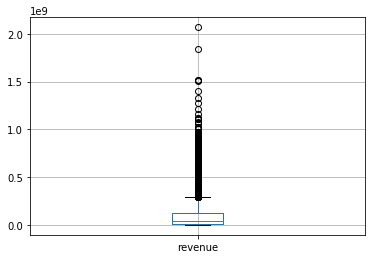

In [53]:
#here we need to remove the outliers from our data
df_mov.boxplot(column=['revenue']);

In [59]:
df_movies_NOO = df_mov[df_mov.revenue < 1500000000]

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [55]:
top10_gens =df_mov['genres'].groupby(df_mov['revenue']).agg(['sum']).tail(10)


In [56]:
top10_gens.reset_index(inplace=True)


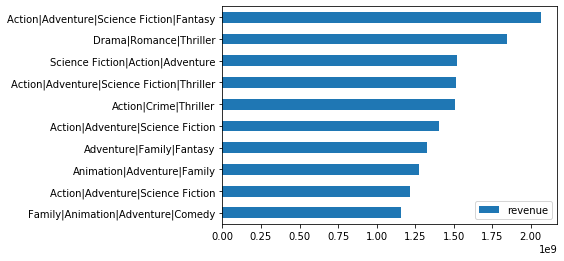

In [60]:
top10_gens.plot.barh();

gen =top10_gens['sum']

plt.yticks([0,1,2,3,4,5,6,7,8,9],gen);

>Here we can see the top 10 geners in movies revenue

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  geners varible had many values so i grouped them with the revnue and took the top 10 to see which geners has the most revnue in our dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I cleaned the data and then i found that the revnue has some outliers so i did a box plot to find the outliers and removed them from our data and I worked my way from then,also i removed the movies that the budget of it is smaller than 20000k for more accurate results and also remove the revenues and budget movies < 0 

## Bivariate Exploration



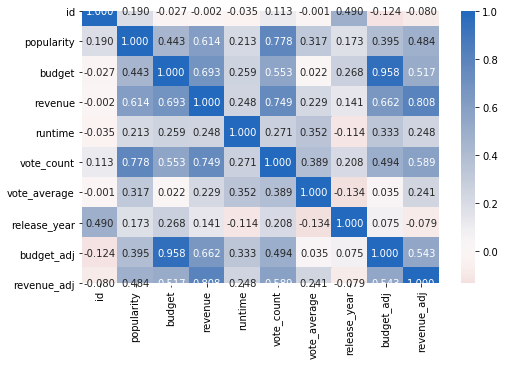

In [62]:
plt.figure(figsize = [8, 5])

sb.heatmap(df_mov.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

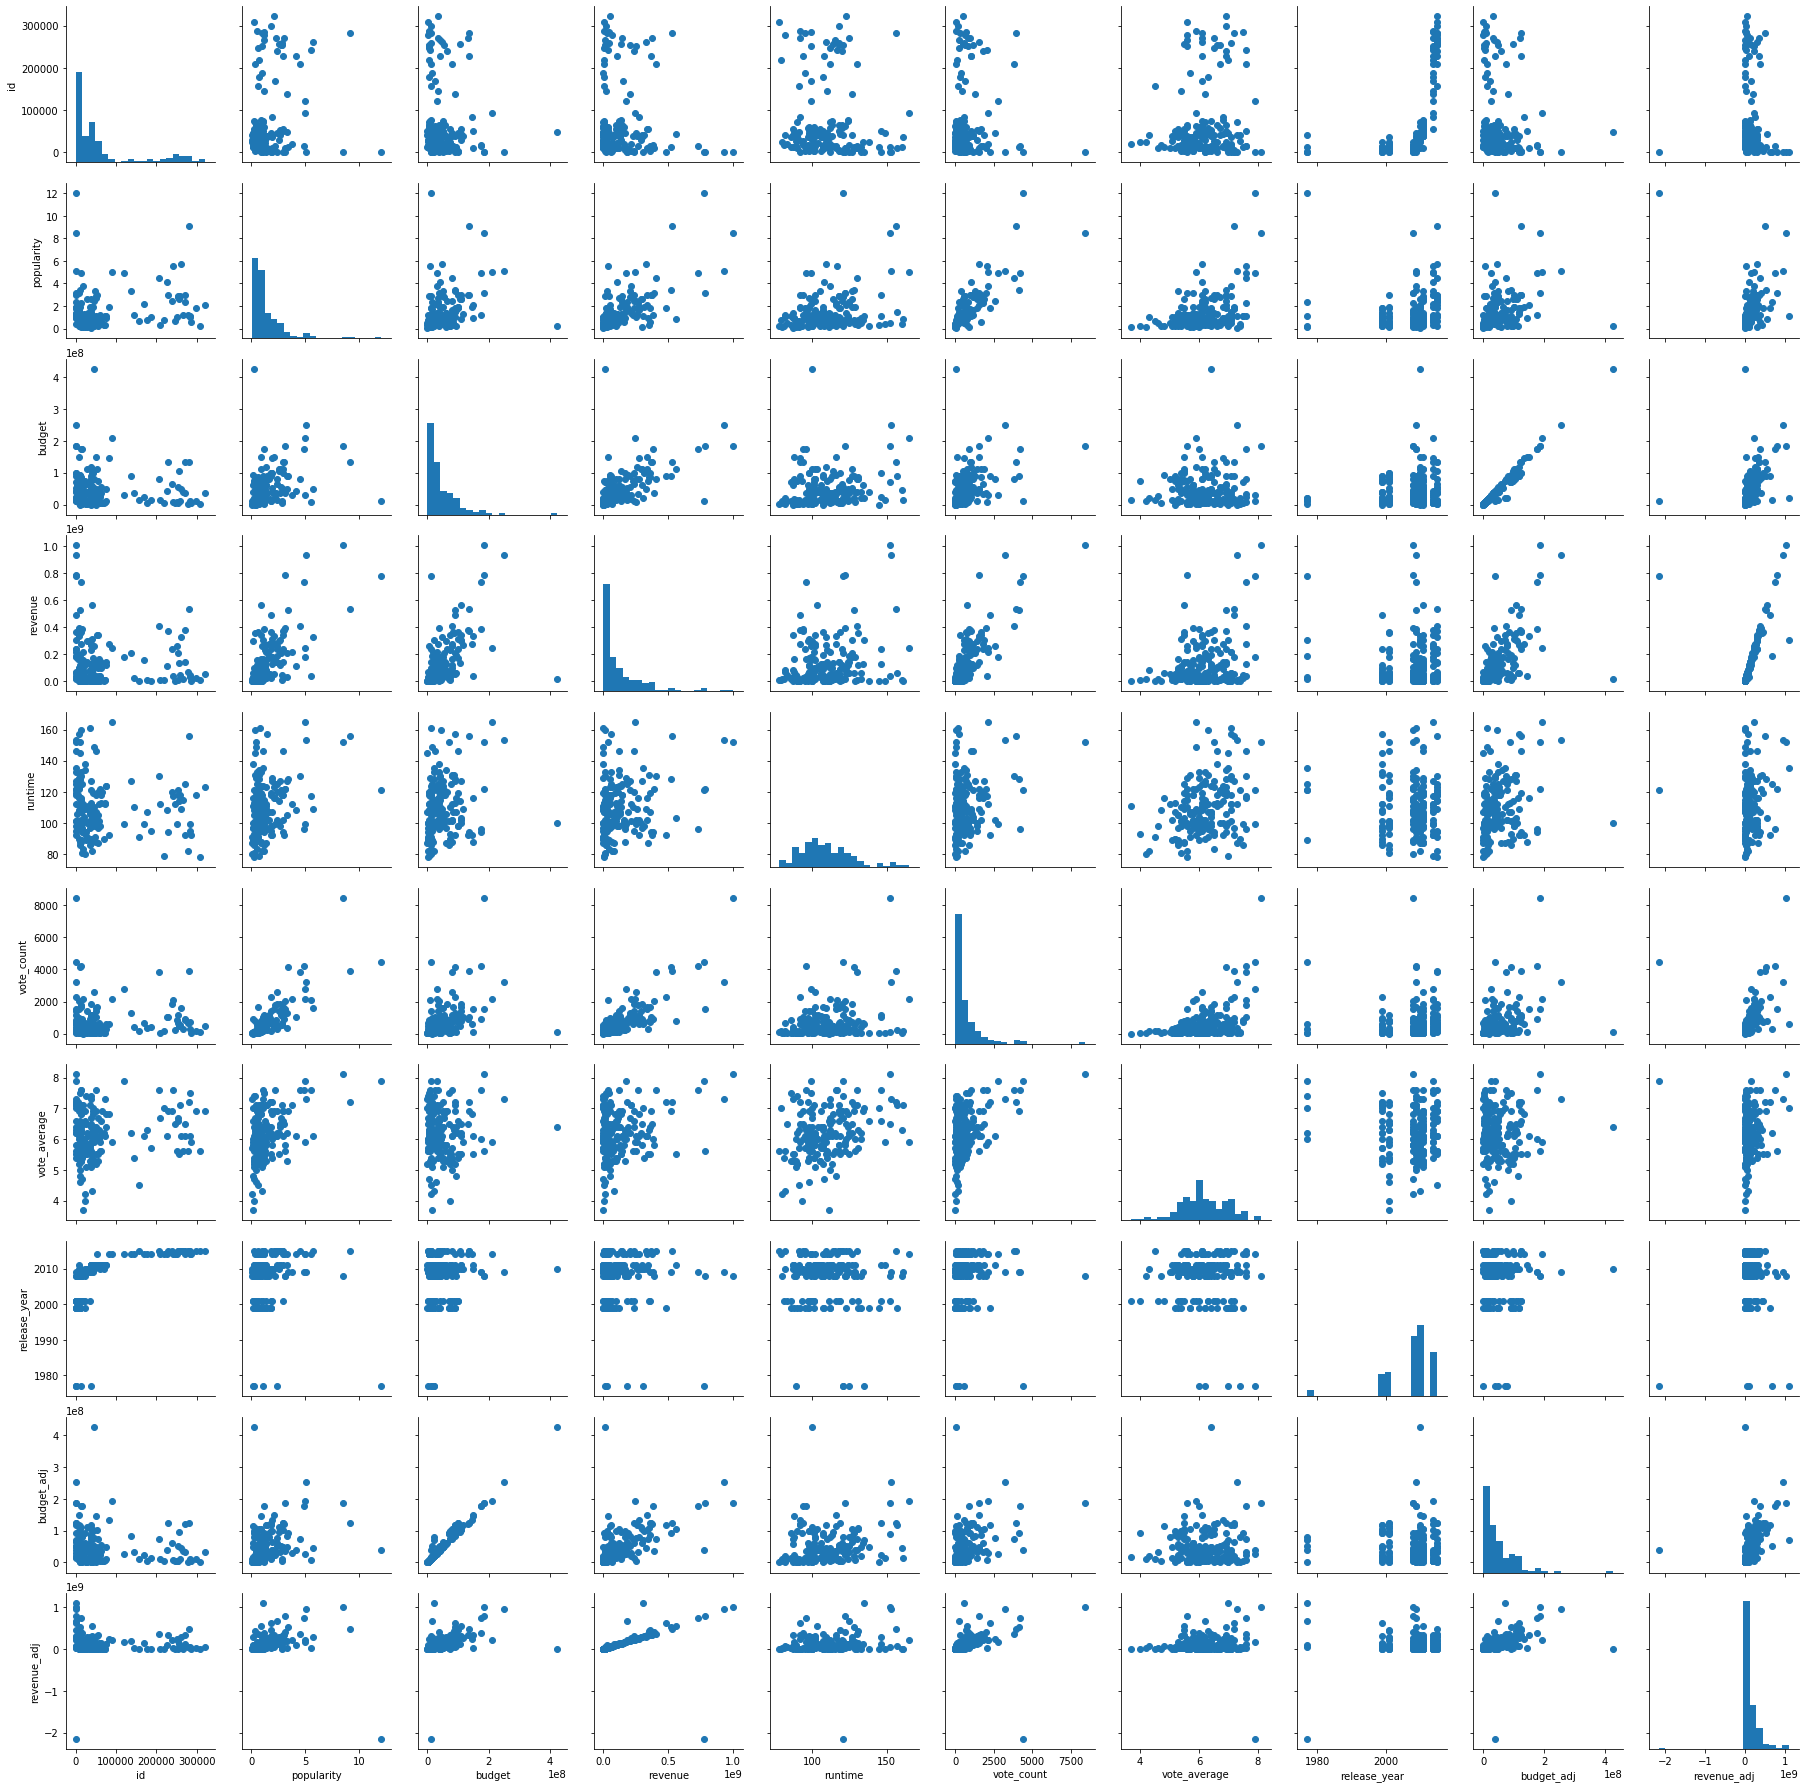

In [64]:
# sample 500 movies so that plots are clearer and they render faster
samples = np.random.choice(df_mov.shape[0], 500, replace = False)
movies_samp = df_mov.loc[samples,:]

g = sb.PairGrid(data = movies_samp)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

> we can see her the coloration betweent the varibles and we can see here strong relation between budegt and revnue and between vote and revenue and btween Popularity and vote

In [66]:
top10_genn =df_movies_NOO.groupby(df_movies_NOO['revenue']).agg(['sum']).tail(10)
top10_genn

,id,imdb_id,popularity,budget,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
revenue,,,,,,,,,,,,,,,,
1081041287,49026,tt1345836,6.591277,250000000,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,Following the death of District Attorney Harve...,165,Action|Crime|Drama|Thriller,7/16/12,6723,7.5,2012,237436070,1026712780
1106279658,1642,tt0113957,1.136610,22000000,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Angela Bennett is a freelance software enginee...,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,31481271,1583049536
1108561013,37724,tt1074638,5.603587,200000000,Skyfall,Daniel Craig|Judi Dench|Javier Bardem|Ralph Fi...,Sam Mendes,When Bond's latest assignment goes gravely wro...,143,Action|Adventure|Thriller,10/25/12,6137,6.8,2012,189948856,1052849482
1118888979,122,tt0167260,7.122455,94000000,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Aragorn is revealed as the heir to the ancient...,201,Adventure|Fantasy|Action,12/1/03,5636,7.9,2003,111423148,1326278010
1123746996,38356,tt1399103,0.760503,195000000,Transformers: Dark of the Moon,Shia LaBeouf|John Malkovich|Ken Jeong|Frances ...,Michael Bay,Sam Witwicky takes his first tenuous steps int...,154,Action|Science Fiction|Adventure,6/28/11,2456,6.1,2011,189032618,1089358138
1156730962,211672,tt2293640,7.404165,74000000,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,68079970,1064192016
1215439994,68721,tt1300854,4.946136,200000000,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,4/18/13,6882,6.9,2013,187206670,1137692372
1274219009,109445,tt2294629,6.112766,150000000,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,11/27/13,3369,7.5,2013,140405002,1192711491


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 7200x720 with 0 Axes>

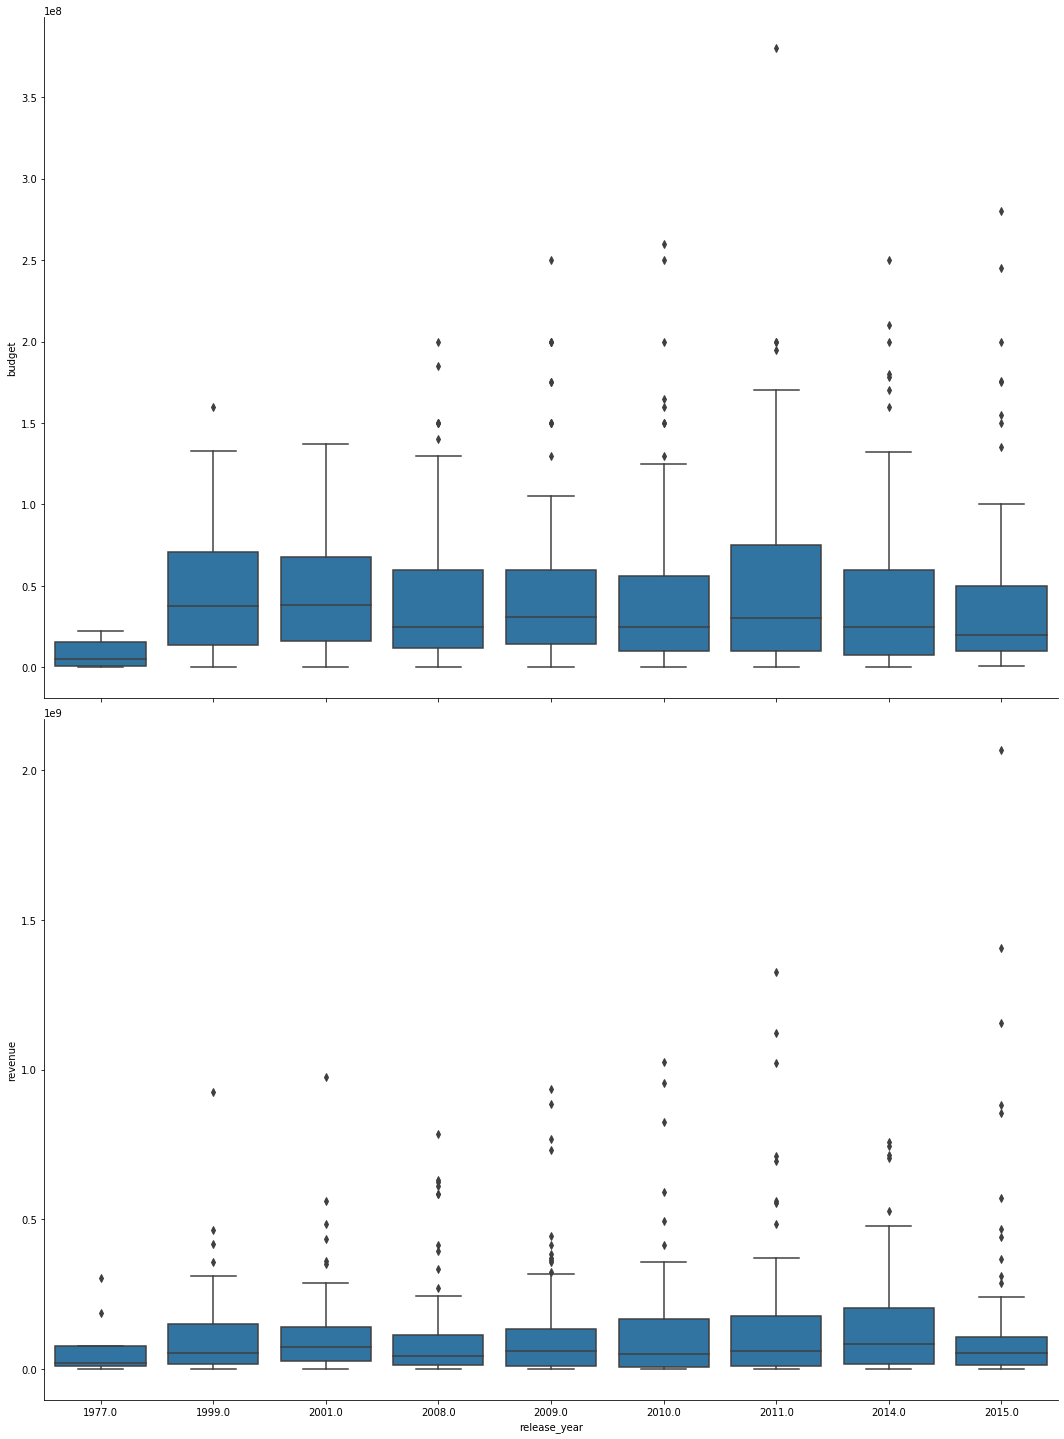

In [67]:
# Here we will plot numirac featuers aganist 1 catigorical featuer 
samples = np.random.choice(df_movies_NOO.shape[0], 2000, replace = False)

movies_samp = df_mov.loc[samples,:]

def boxgrid(x, y, **kwargs):
    
    default_color = sb.color_palette()[0]
    
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [100, 10])

g = sb.PairGrid(data = movies_samp, y_vars = ['budget', 'revenue'], x_vars = ['release_year'],
                size = 10, aspect = 1.5)
g.map(boxgrid)

plt.show();


>We can see here that the year 2015 has the most budegt and revnue movies 

In [68]:
df_movies_NOO= df_movies_NOO[df_movies_NOO.revenue > 0]

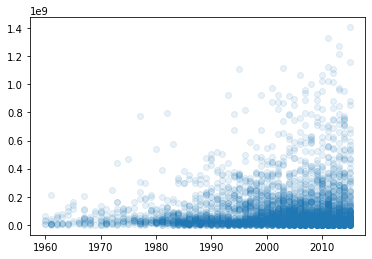

In [72]:
plt.scatter(data=df_movies_NOO,x='release_year',y='revenue',alpha = 1/10);

>Here we can see that there is a strong relation  between the years and the revenue in the dataset.

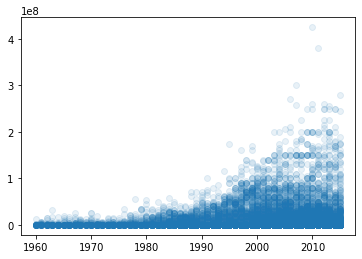

In [71]:
plt.scatter(data=df_movies_NO_OT,x='release_year',y='budget',alpha = 1/10);

>  throw out the years the movies budegt didn't jumb that much.

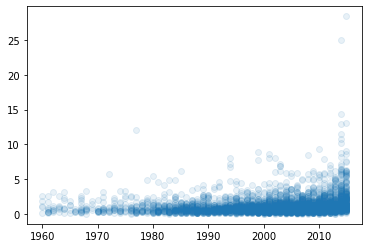

In [73]:
plt.scatter(data=df_movies_NOO,x='release_year',y='popularity',alpha = 1/10);

> here more people are interesting into cinemas throw out the years in the dataset

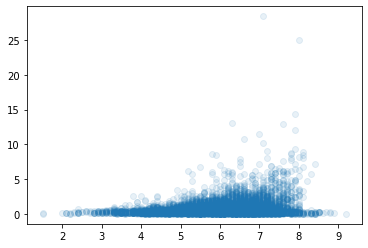

In [74]:
plt.scatter(data=df_movies_NO_OT,x='vote_average',y='popularity',alpha = 1/10);

>Here we can see that it's not neccesary that the movie is popular that it gets alot of votes not neccesary

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Revenue and  budget was obvious relation also btween vote count and revenue and the unusal realtion was between release year and budget. 
The features of interest has strong correlation between each other and a very low correlation with the other  features in the dataset

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The first relation i found between revenue and  budget and it's a postive relation, I found out from the realtion of the release year and the revenue that 2015 had the most revenue income in the movies histroy, 
aslo I found out that the popularty of the movies increased throw out the years also the revenue had increased alot , the budegt of the movies kept increasing in a low freaqancy , 
also I found out that it despite the how popular is the movie the rating can be low.

## Multivariate Exploration


In [78]:
df_movies_M100 = df_movies_NOO[df_movies_NOO.revenue >= 100000000]
df_movies_M100 = df_movies_M100[df_movies_M100.release_year >= 2000]

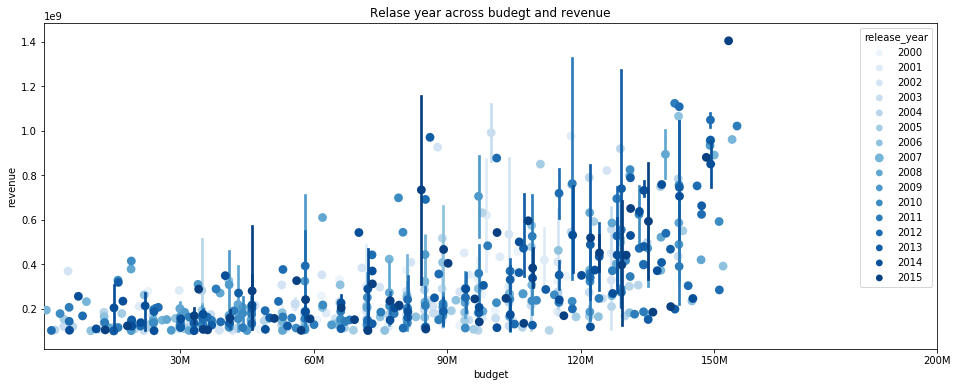

In [79]:
fig = plt.figure(figsize = [16,6])
ax = sb.pointplot(data = df_movies_M100, x = 'budget', y = 'revenue', hue = 'release_year',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.title('Relase year across budegt and revenue')

ax.set_xticklabels([],minor = False)
plt.xticks([30,60,90,120,150,200],['30M','60M','90M','120M','150M','200M'])

plt.show();

>Here we found out the movies production  increasd alot from the year 2011 to 2015

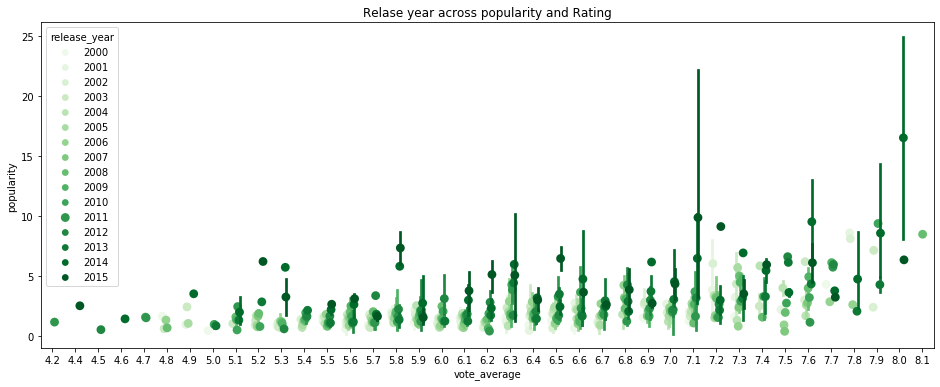

In [81]:
fig = plt.figure(figsize = [16,6])
ax = sb.pointplot(data = df_movies_M100, x = 'vote_average', y = 'popularity', hue = 'release_year',
           palette = 'Greens', linestyles = '', dodge = 0.4)

plt.title('Relase year across popularity and Rating')

plt.show();

>We can see here that popularity and Rating are slowly icreasing throw out the years with no major difference!

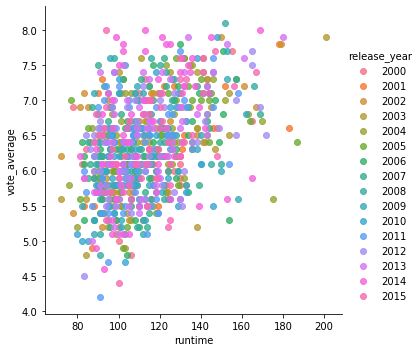

In [82]:
sb.lmplot(x='runtime', y='vote_average', hue='release_year', 
           data=df_movies_M100, 
           fit_reg=False);


>Here we can see that the movies run time is almost consistent throw out the years and also almost  centerd on the 100 min runtime

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> i made a relation btween the revenue and the budegt and the release year to showcase how the years affected the movies budget and revenue and it's postive,

The secound relation i made is between popularity and rating and release yearand i wanted to do that see throw the years how the people movies Knowladge affected thier ratings , 

and last I wanted to see if the movies runtime when they are long or shot affect the movies rating or no. 
The featuers that strengthened each other were relase year and vote average "Rating".


### Were there any interesting or surprising interactions between features?

> Yes there was, I found out that the budegt and revenue increasd alot throw out the years.

I also found out that it doesn't matter if the movie is popular it can take a bad rating throw out the years. 

Finaly the movies runtime average  form the 60s to the 2000s is almost the same on 100 min and the relation btween runtime and vote average is not strong enogh.